# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)
5. [Homework: Additional exercises](#homework)

## Importing Libraries <a class="anchor" id="libraries" ></a>

Before executing this notebook, it is highly recomended to install Conda and setup a venv.

Conda is needed to install `Pillow` [[ref](https://stackoverflow.com/questions/74047963/i-cant-install-image-slicer-library)], which in turn is needed to install `image_slicer`.

For the other libraries, you can use `pip` or `conda`.

---

NOTE: `Pillow` and `PIL` can't be in the same env. First remove any `PIL` installations before trying to install `Pillow`

In [3]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage import gaussian_filter as gauss
from scipy.ndimage import median_filter as med
import cv2

In [4]:
IMAGE_PATH = 'data/image.jpg'

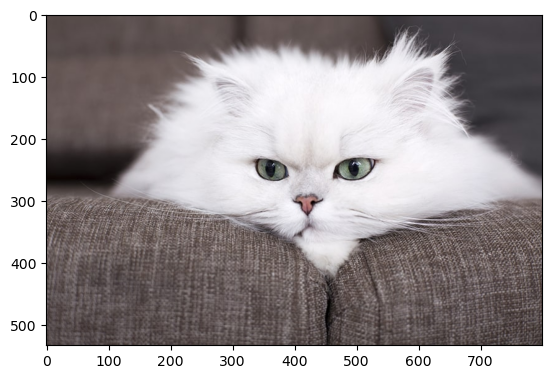

In [5]:
original_image = Image.open(IMAGE_PATH)
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('data/img.npy', original_image)

#Load the image
original_image = np.load('data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

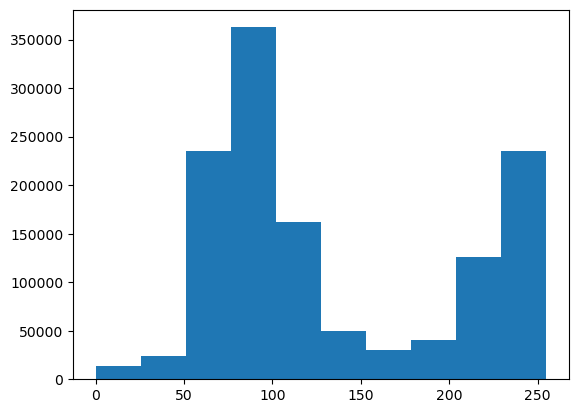

In [6]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

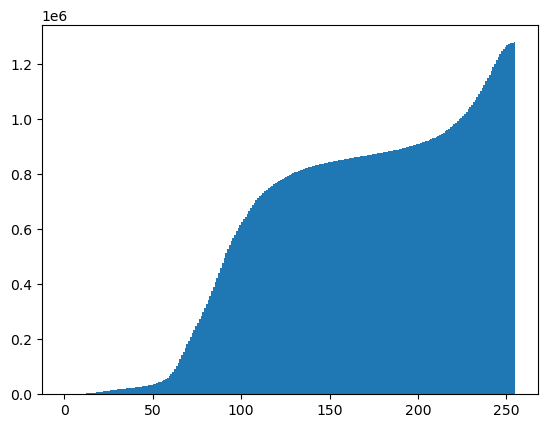

In [7]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/Users/cesarivp/miniconda3/envs/myenv/lib/python3.12/site-packages/skimage/_shared/utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


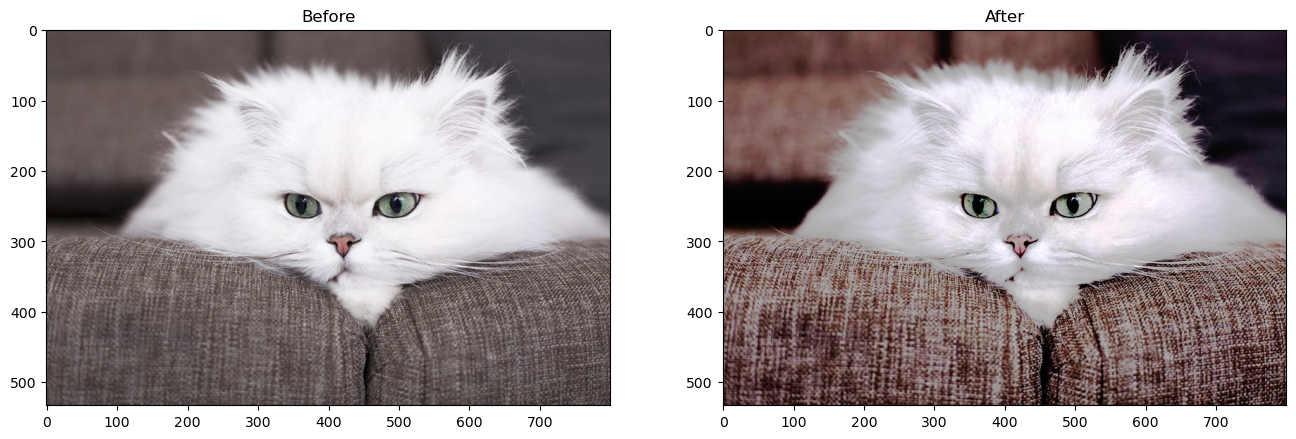

In [8]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

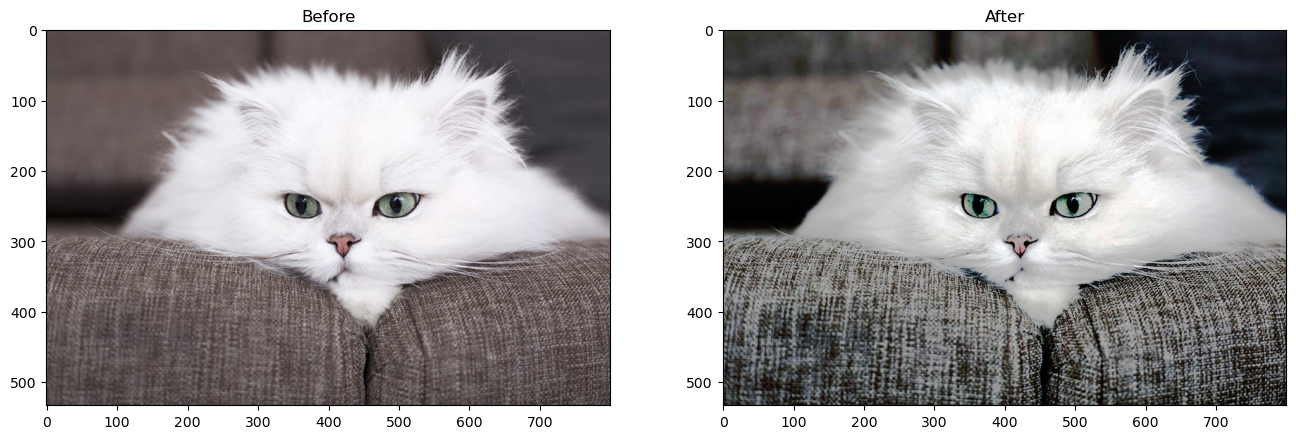

In [9]:
# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

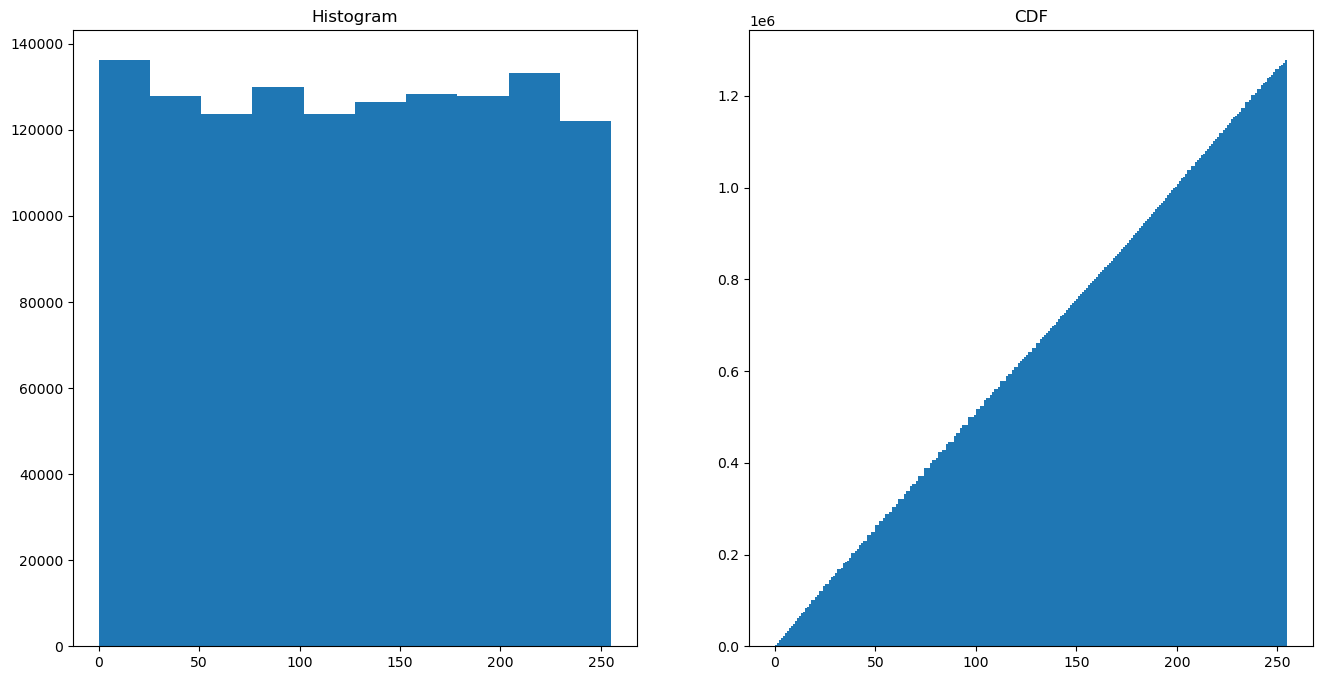

In [10]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

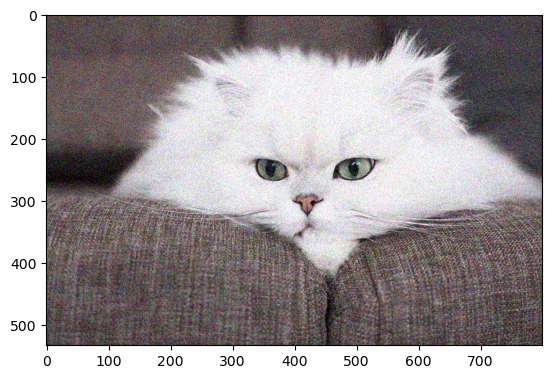

In [11]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

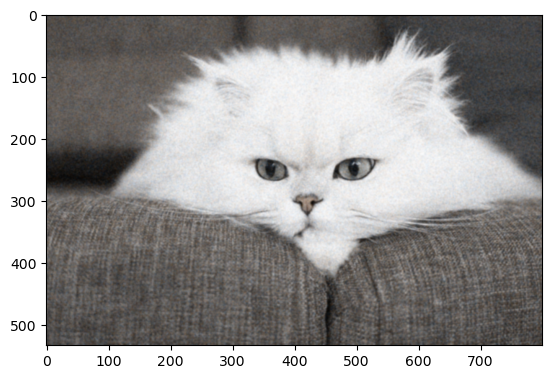

In [12]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

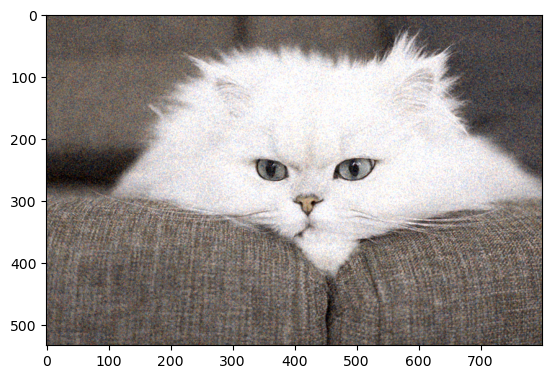

In [13]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [14]:
from image_slicer import slice

n = 4
slices = slice(IMAGE_PATH, n)

In [15]:
def equalize(image_path:str) -> np.ndarray:
    '''
    Given an image path, applies histogram equalization.
    @image_path: Path to the image.
    @returns: Equalized numpy array representing the image.
    '''
    return exposure.equalize_hist(
        np.array(Image.open(image_path)))

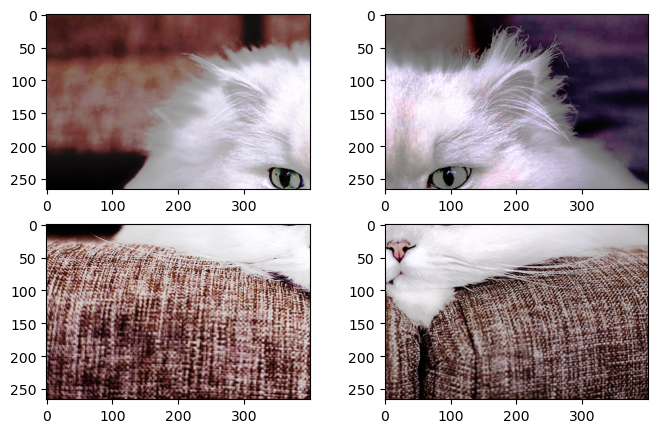

In [28]:
fig = plt.figure(figsize=(8, 5))

plt.subplot(2,2,1)
plt.imshow(equalize('data/image_01_01.png')) # No need to transform back into an image, imshow infers the image from the array.

plt.subplot(2,2,2)
plt.imshow(equalize('data/image_01_02.png'))

plt.subplot(2,2,3)
plt.imshow(equalize('data/image_02_01.png'))

plt.subplot(2,2,4)
plt.imshow(equalize('data/image_02_02.png'))

plt.show()

## Homework: Additional exercises  <a class="anchor" id="homework"></a>

### 1. Research and implement the tile-based histogram equalization method. In these methods, the image is partitioned into different windows (i.e. mosaics) and the histograms are calculated independently, applying the correction on each window. There is a trade-off between window size and computational complexity, which is why it is more complex than the simple method. Deploy this version and perform some tests varying the window size. Another drawback is that possible differences can be observed between the contrast of the blocks. How could this be improved?

In [17]:
def tile_histogram_equalization(file_name, tile_size):
    image_pil = Image.open(file_name).convert('L')
    image = np.array(image_pil)

    height, width = image.shape
    result = np.zeros_like(image) # Init the array with the size of the image.

    for i in range(0, height, tile_size):
        for j in range(0, width, tile_size):
            tile = image[i:i + tile_size, j:j + tile_size]
            equalized_tile = cv2.equalizeHist(tile) # This API is similar to the exposure's one, but directly from OpenCV.
            result[i:i + tile_size, j:j + tile_size] = equalized_tile

    return result

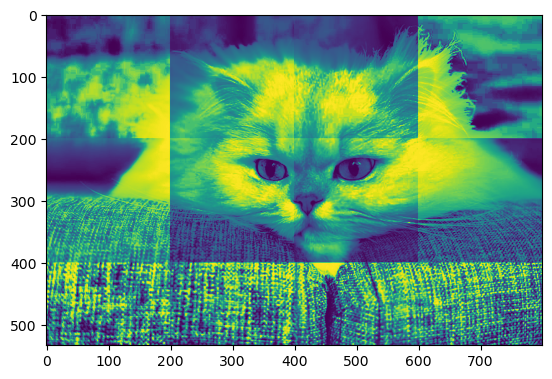

In [18]:
tile_size = 200

result_image = tile_histogram_equalization(IMAGE_PATH, tile_size)

plt.imshow(result_image)

##### Larger Tile Size:
- Advantages:
    - Reduced computational complexity, as fewer tiles need to be processed.
    - Smoother equalization that can help reduce noise.
- Disadvantages:
    - May oversimplify local variations and details.
    - Could lead to a loss of information in regions with varying contrast.

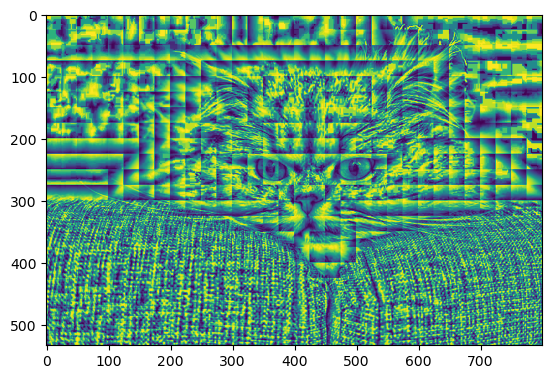

In [19]:
tile_size = 25

result_image = tile_histogram_equalization(IMAGE_PATH, tile_size)

plt.imshow(result_image)

##### Smaller Tile Size:
- Advantages:
    - Captures local details and variations in contrast.
    - May enhance the visibility of small features in the image.
- Disadvantages:
    - Increased computational complexity due to processing more tiles.
    - Greater sensitivity to noise, which may be amplified in small regions.

To address the drawback of possible differences in contrast between blocks, you can consider adaptive methods. One popular technique is adaptive histogram equalization (AHE) or its variants like contrast limited adaptive histogram equalization (CLAHE). These methods adaptively adjust the contrast in each local region, preventing over-amplification of noise and preserving details.

In [20]:
def tile_histogram_equalization_clahe(file_name, clip_limit, tile_grid_size=(8,8)):
    image_pil = Image.open(IMAGE_PATH).convert('L')
    image = np.array(image_pil)

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    result = clahe.apply(image)

    return result

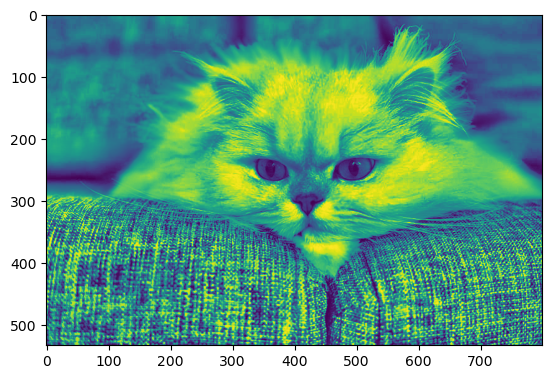

In [21]:
clip_limit = 6

result_image_clahe = tile_histogram_equalization_clahe(IMAGE_PATH, clip_limit)

plt.imshow(result_image_clahe)

> References:
> - Contrast Limited Adaptive Histogram Equalization - MATLAB & SimulInk - MathWorks España. (s. f.). https://es.mathworks.com/help/visionhdl/ug/contrast-adaptive-histogram-equalization.html
> - Rosebrock, A. (2021b, abril 17). OpenCV Histogram Equalization and Adaptive Histogram Equalization (CLAHE) - PyImageSearch. PyImageSearch. https://pyimagesearch.com/2021/02/01/opencv-histogram-equalization-and-adaptive-histogram-equalization-clahe/

### 2. Research and implement a simple Sliding Window Adaptive Histogram Equalization (SWAHE) method and compare some images with different types of images.

The Sliding Window Adaptive Histogram Equalization is a method that enhances the contrast of an image by dividing it into small regions or windows and applying histogram equalization independently to each window. This adaptive approach is beneficial for images with varying illumination conditions.

This algorithm is born by the alternative approach to tiling the image within the Adaptive histogram equalization (AHE) algorithm (which is the original idea), instead making the rectangle "slide" one pixel at a time, and only incrementally update the histogram for each pixel,by adding the new pixel row and subtracting the row left behind. The computational complexity of histogram calculation is then reduced from O(n²) to O(n) (with n = pixel width of the surrounding rectangle); and since there is no tiling a final interpolation step is not required.

In the following example, we'll use 4 images, each with different levels of illumination due to varying conditions, like a low contrast filter or due to being taken during the night.

In [22]:
def init_plt_figure(figure_size):
    plt.figure(figsize=figure_size)

def display_grid_image(image, subplot_coordinates, title):
    plt.subplot(subplot_coordinates[0],
                subplot_coordinates[1],
                subplot_coordinates[2])
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis("off")

def commit_plt_figure():
    plt.show()

In [23]:
def sliding_window_adaptive_histogram_equalization(image, window_size):
    rows, cols = image.shape
    equalized_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(0, rows, window_size):
        for j in range(0, cols, window_size):
            window = image[i:i + window_size, j:j + window_size]
            equalized_window = cv2.equalizeHist(window)
            equalized_image[i:i + window_size, j:j + window_size] = equalized_window

    return equalized_image

In [24]:
image1 = cv2.imread("data/image.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("data/image2.jpg", cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread("data/image3.jpg", cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread("data/image4.jpg", cv2.IMREAD_GRAYSCALE)

In [25]:
window_size = 16

equalized_image1 = sliding_window_adaptive_histogram_equalization(image1, window_size)
equalized_image2 = sliding_window_adaptive_histogram_equalization(image2, window_size)
equalized_image3 = sliding_window_adaptive_histogram_equalization(image3, window_size)
equalized_image4 = sliding_window_adaptive_histogram_equalization(image4, window_size)

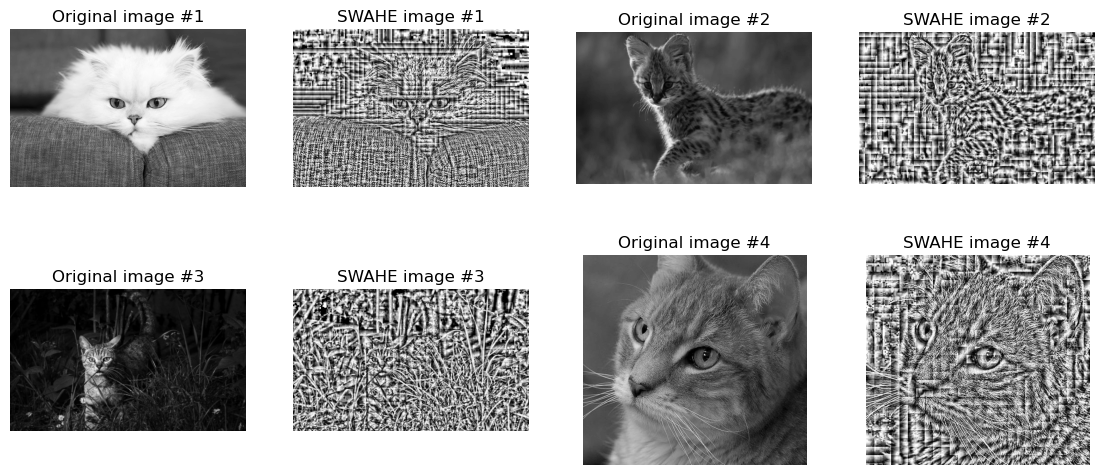

In [26]:
init_plt_figure((14, 6))

display_grid_image(image1, (2, 4, 1), "Original image #1")
display_grid_image(equalized_image1, (2, 4, 2), "SWAHE image #1")

display_grid_image(image2, (2, 4, 3), "Original image #2")
display_grid_image(equalized_image2, (2, 4, 4), "SWAHE image #2")

display_grid_image(image3, (2, 4, 5), "Original image #3")
display_grid_image(equalized_image3, (2, 4, 6), "SWAHE image #3")

display_grid_image(image4, (2, 4, 7), "Original image #4")
display_grid_image(equalized_image4, (2, 4, 8), "SWAHE image #4")

commit_plt_figure()

> References:
> - Sund, T., & Møystad, A. (2006). Sliding Window Adaptive histogram Equalization of intraoral radiographs: Effect on image quality. Dentomaxillofacial Radiology, 35(3), 133-138. https://doi.org/10.1259/dmfr/21936923
> - S. M. Pizer, E. P. Amburn, J. D. Austin, et al.: Adaptive Histogram Equalization and Its Variations. Computer Vision, Graphics, and Image Processing 39 (1987) 355-368.

### 3. Investigate how the CLAHE (contrast limited adaptive histogram equalization) algorithm works and make an implementation (it can be using the OpenCV implementation). Test on different types of images and compare with the basic histogram equalization method. Provides a brief description of the method based on bibliographic research.

Contrast Limited Adaptive Histogram Equalization (CLAHE) is a variant of Adaptive Histogram Equalization (AHE) were contrast amplification is limited in order to reduce the noise amplification problem.

CLAHE works by dividing the image into small regions called tiles. Then, it applies histogram equalization to each tile. Finally, it combines the neighboring tiles using bilinear interpolation to remove artificial boundaries.

CLAHE limits the amplification by clipping the histogram at a predefined value before computing the cumulative distribution function.

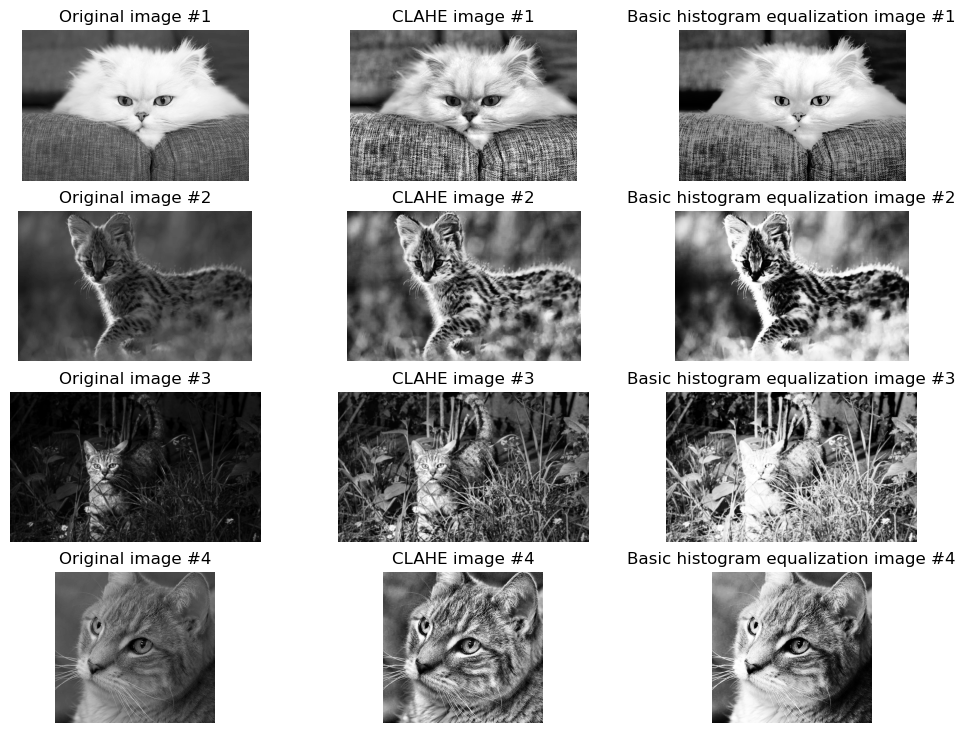

In [37]:
images = [image1, image2, image3, image4]

init_plt_figure((12, 9))

pltIndex = 1
imgNumber = 1
for image in images:
  clahe = cv2.createCLAHE(clipLimit=4)
  eqImg = cv2.equalizeHist(image)
  finalImg = clahe.apply(image)
  display_grid_image(image, (4, 3, pltIndex), "Original image #{}".format(imgNumber))
  pltIndex += 1
  display_grid_image(finalImg, (4, 3, pltIndex), "CLAHE image #{}".format(imgNumber))
  pltIndex += 1
  display_grid_image(eqImg, (4, 3, pltIndex), "Basic histogram equalization image #{}".format(imgNumber))
  pltIndex += 1
  imgNumber += 1

commit_plt_figure()

> References:
> - Fernandez Villan, A. (2019). Mastering OpenCV 4 with Python. Packt Publishing